In [65]:
import pandas as pd
import numpy as np 
import os, sys
sys.path.append(os.getcwd())
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [66]:
cierre_agricola =pd.read_csv('/home/sayi/NC.c20-64-m-data-bi/DataSets/cierre_agricola.csv', encoding='latin1')
dfPP = pd.read_csv('/home/sayi/NC.c20-64-m-data-bi/DataSets/PP_Chiapas.csv', encoding='latin1')
dfPT = pd.read_csv('/home/sayi/NC.c20-64-m-data-bi/DataSets/dfPT.csv', encoding='latin1')
dfS = pd.read_csv('/home/sayi/NC.c20-64-m-data-bi/DataSets/Suelos_Chiapas.csv', encoding='latin1')


In [67]:
cierre_agricola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22098 entries, 0 to 22097
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Anio                22098 non-null  int64  
 1   Idestado            22098 non-null  int64  
 2   Nomestado           22098 non-null  object 
 3   Idddr               22098 non-null  int64  
 4   Nomddr              22098 non-null  object 
 5   Idcader             22098 non-null  int64  
 6   Nomcader            22098 non-null  object 
 7   Idmunicipio         22098 non-null  int64  
 8   Nommunicipio        22098 non-null  object 
 9   Idciclo             22098 non-null  int64  
 10  Nomcicloproductivo  22098 non-null  object 
 11  Idmodalidad         22098 non-null  int64  
 12  Nommodalidad        22098 non-null  object 
 13  Idunidadmedida      22098 non-null  int64  
 14  Nomunidad           22098 non-null  object 
 15  Idcultivo           22098 non-null  int64  
 16  Nomc

In [68]:
df = cierre_agricola
# Filtrar el DataFrame para excluir las filas donde 'Nomcultivo' es 'Pastos y praderas'
df = df[df['Nomcultivo'] != 'Pastos y praderas']

# Verifica que se haya eliminado correctamente
print(df['Nomcultivo'].unique())

['MaÃ\xadz grano' 'SandÃ\xada' 'Sorgo grano' 'Cacahuate' 'Aguacate'
 'Ciruela' 'LimÃ³n' 'Mango' 'Naranja' 'Papaya' 'Frijol' 'CafÃ© cereza'
 'Mandarina' 'PlÃ¡tano' 'Cebolla' 'Chile verde' 'MelÃ³n' 'Guayaba' 'Mamey'
 'Zapote' 'Pimienta' 'Cacao' 'Nanche' 'Tomate rojo (jitomate)'
 'Tomate verde' 'MaraÃ±Ã³n' 'Tamarindo' 'CaÃ±a de azÃºcar' 'Durazno'
 'Manzana' 'Col (repollo)' 'Papa' 'PerÃ³n' 'Tejocote' 'Trigo grano' 'Lima'
 'Toronja (pomelo)' 'Zarzamora' 'Garbanzo grano' 'Pepino' 'Arroz palay'
 'Chile seco' 'Girasol' 'Hule hevea' 'Palma africana o de aceite'
 'Macadamia' 'Tabaco' 'AjonjolÃ\xad' 'Soya' 'Copra' 'PiÃ±a'
 'Calabaza semilla o chihua' 'Vainilla' 'Camote'
 'Sorgo forrajero en verde' 'Hortalizas' 'RambutÃ¡n'
 'CaÃ±a de azÃºcar piloncillo' 'Palma camedor' 'Pera' 'PiÃ±Ã³n'
 'Semilla de caÃ±a de azÃºcar' 'Litchi' 'Semilla de soya' 'Stevia'
 'Semilla de maÃ\xadz grano' 'MangostÃ¡n' 'Elote' 'Chayote' 'Granada'
 'Crisantemo (gruesa)' 'Lilium (gruesa)' 'Palma camedor (gruesa)']


In [69]:
df.rename(columns= {'Anio': 'Año' ,'Nomestado': 'Estado', 'Nommunicipio': 'Municipio', }, inplace=True)

/tmp/ipykernel_423/767272086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns= {'Anio': 'Año' ,'Nomestado': 'Estado', 'Nommunicipio': 'Municipio', }, inplace=True)


In [70]:
sin_pasto = df.groupby('Año').agg({
    'Volumenproduccion': 'sum',
    'Valorproduccion': 'sum', 
}).reset_index()

In [71]:
dfPT.rename(columns={'AÃ±o': 'Año', 'Anual': 'PromTemp_anual'}, inplace=True)

In [72]:
dfPP.rename(columns={'AÃ±o': 'Año', 'Anual': 'Prec_anual'}, inplace=True)

In [73]:
dfPP

,ID_AÃ±o,Año,ID_Estado,Estado,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Prec_anual
0,1.0,2003,7,Chiapas,23.9,13.5,35.6,26.5,145.4,314.6,232.9,309.8,371.5,253.4,155.4,53.1,1935.6
1,2.0,2004,7,Chiapas,45.7,42.3,31.1,42.8,193.8,250.2,249.1,195.7,310.8,235.2,69.1,48.0,1713.8
2,3.0,2005,7,Chiapas,8.5,19.7,33.8,47.4,158.4,413.4,350.8,338.9,362.7,315.0,56.8,85.3,2190.7
3,4.0,2006,7,Chiapas,78.4,47.3,32.2,49.2,229.7,447.0,356.7,285.1,339.4,323.5,94.4,71.3,2354.2
4,5.0,2007,7,Chiapas,104.0,31.6,33.4,58.5,148.0,256.6,279.3,459.1,368.3,503.2,41.4,19.2,2302.6
5,6.0,2008,7,Chiapas,69.9,50.6,33.3,90.8,203.2,431.3,390.0,315.8,486.0,224.2,25.8,34.0,2354.9
6,7.0,2009,7,Chiapas,47.0,18.5,29.0,27.0,168.1,369.0,214.5,333.7,300.0,245.9,142.0,58.4,1953.1
7,8.0,2010,7,Chiapas,45.1,17.8,14.8,70.4,186.4,507.5,395.1,756.7,559.5,58.4,89.9,28.7,2730.3
8,9.0,2011,7,Chiapas,46.0,37.1,84.3,74.2,149.5,300.6,458.5,433.7,422.3,273.7,58.8,42.9,2381.6
9,10.0,2012,7,Chiapas,53.3,38.6,58.2,57.8,181.1,264.0,211.8,418.1,321.3,194.4,29.0,57.7,1885.3


In [74]:
dfPP['Prom_anual']=dfPP['Prec_anual']/12

In [75]:
dfPP = dfPP[['Año','Prom_anual']]
dfPT = dfPT[['Año','PromTemp_anual']]

In [76]:
df_pred = pd.merge(sin_pasto, dfPP, on=['Año'], how='left')
df_pred = pd.merge(df_pred, dfPT, on=['Año'], how='left')

df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                21 non-null     int64  
 1   Volumenproduccion  21 non-null     float64
 2   Valorproduccion    21 non-null     float64
 3   Prom_anual         21 non-null     float64
 4   PromTemp_anual     21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 972.0 bytes


In [77]:
#Predicciones para los proximos 5 años para el volumen de producciòn

X = df_pred[['Año', 'Valorproduccion','Prom_anual','PromTemp_anual']]
y = df_pred['Volumenproduccion']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creando y entrenando el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

años_futuros = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
X_futuro = pd.DataFrame({'Año': años_futuros.flatten(),
                         'Valorproduccion':np.mean(X_train['Valorproduccion']),
                          'Prom_anual': np.mean(X_train['Prom_anual']),
                          'PromTemp_anual': np.mean(X_train['PromTemp_anual'])})

#Escalar los datos de predicciòn futura
X_futuro_scaled = scaler.transform(X_futuro)

predicciones_futuras = model.predict(X_futuro_scaled)

#Mostrar las predicciones
for Año, pred in zip(años_futuros.flatten(), predicciones_futuras):
    print(f'Predicciòn para el año {Año}: {pred:.2f} toneladas')

#Evaluacion del modelo en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

#Calcular las mètricas de error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred)/ y_test))*100

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse: .2f}')
print(f' MAPE: {mape:.2f}%')




Predicciòn para el año 2024: 6316511.33 toneladas
Predicciòn para el año 2025: 6298472.66 toneladas
Predicciòn para el año 2026: 6280433.99 toneladas
Predicciòn para el año 2027: 6262395.33 toneladas
Predicciòn para el año 2028: 6244356.66 toneladas
MAE: 275386.16
RMSE:  395208.98
 MAPE: 4.33%


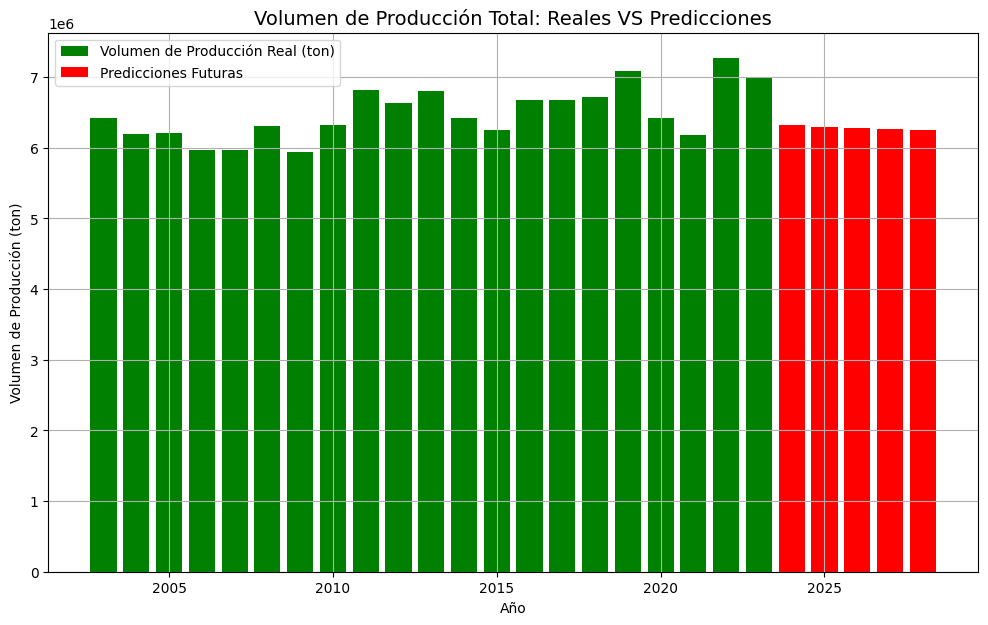

In [78]:
# Graficar volumen de producción

#Datos futuros (años y predicciones)
años_futuros_lista = años_futuros.flatten().tolist()
produccion_predicciones_futuras = predicciones_futuras.tolist()

plt.figure(figsize=(12, 7))
# Gráfica de barras para los datos históricos
plt.bar(df_pred['Año'], df_pred['Volumenproduccion'], label='Volumen de Producción Real (ton)', color='green')
# Gráfica de barras para las predicciones futuras
plt.bar(años_futuros_lista, produccion_predicciones_futuras, label='Predicciones Futuras', color='red')

plt.title('Volumen de Producción Total: Reales VS Predicciones', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Volumen de Producción (ton)')
plt.legend()
plt.grid(True)
plt.show()



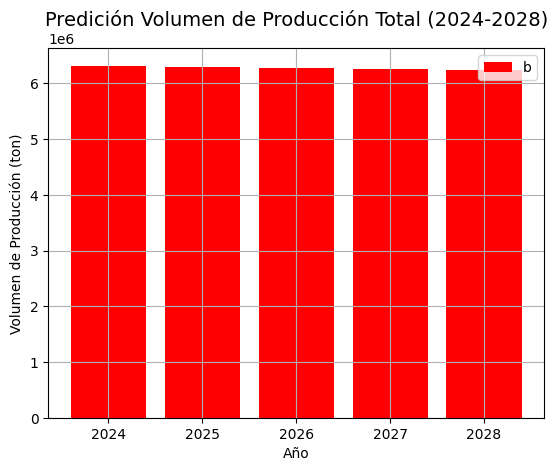

In [79]:
#ºgraficar las predicciones
plt.bar(años_futuros.flatten(), produccion_predicciones_futuras, label='Predicciones Futuras', color='red')
plt.title('Predición Volumen de Producción Total (2024-2028)', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Volumen de Producción (ton)')
plt.legend('best')
plt.grid(True)
plt.show()


In [80]:
cultivos_comer = ['Aguacate','CafÃ© cereza','CaÃ±a de azÃºcar','PlÃ¡tano','Mango', 'Papaya', 'Cacao','Palma africana o de aceite']
df_comer = df[df['Nomcultivo'].isin(cultivos_comer)]
df_comer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5755 entries, 6 to 22097
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Año                 5755 non-null   int64  
 1   Idestado            5755 non-null   int64  
 2   Estado              5755 non-null   object 
 3   Idddr               5755 non-null   int64  
 4   Nomddr              5755 non-null   object 
 5   Idcader             5755 non-null   int64  
 6   Nomcader            5755 non-null   object 
 7   Idmunicipio         5755 non-null   int64  
 8   Municipio           5755 non-null   object 
 9   Idciclo             5755 non-null   int64  
 10  Nomcicloproductivo  5755 non-null   object 
 11  Idmodalidad         5755 non-null   int64  
 12  Nommodalidad        5755 non-null   object 
 13  Idunidadmedida      5755 non-null   int64  
 14  Nomunidad           5755 non-null   object 
 15  Idcultivo           5755 non-null   int64  
 16  Nomcultivo

In [81]:
df_comerT = df_comer.groupby('Año').agg({
    'Volumenproduccion': 'sum',
    'Valorproduccion': 'sum', 
}).reset_index()

In [82]:
df_pred_comer = pd.merge(df_comerT, dfPP, on=['Año'], how='left')
df_pred_comer = pd.merge(df_pred_comer, dfPT, on=['Año'], how='left')

df_pred_comer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                21 non-null     int64  
 1   Volumenproduccion  21 non-null     float64
 2   Valorproduccion    21 non-null     float64
 3   Prom_anual         21 non-null     float64
 4   PromTemp_anual     21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 972.0 bytes


In [83]:
#Predicciones para los proximos 5 años para el volumen de producciòn

X = df_pred_comer[['Año', 'Valorproduccion','Prom_anual','PromTemp_anual']]
y = df_pred_comer['Volumenproduccion']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creando y entrenando el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

años_futuros = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
X_futuro = pd.DataFrame({'Año': años_futuros.flatten(),
                         'Valorproduccion':np.mean(X_train['Valorproduccion']),
                          'Prom_anual': np.mean(X_train['Prom_anual']),
                          'PromTemp_anual': np.mean(X_train['PromTemp_anual'])})

#Escalar los datos de predicciòn futura
X_futuro_scaled = scaler.transform(X_futuro)

predicciones_futuras = model.predict(X_futuro_scaled)

#Mostrar las predicciones
for Año, pred in zip(años_futuros.flatten(), predicciones_futuras):
    print(f'Predicciòn para el año {Año}: {pred:.2f} toneladas')

#Evaluacion del modelo en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

#Calcular las mètricas de error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred)/ y_test))*100

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse: .2f}')
print(f' MAPE: {mape:.2f}%')



Predicciòn para el año 2024: 4713296.48 toneladas
Predicciòn para el año 2025: 4714229.71 toneladas
Predicciòn para el año 2026: 4715162.93 toneladas
Predicciòn para el año 2027: 4716096.16 toneladas
Predicciòn para el año 2028: 4717029.39 toneladas
MAE: 108747.82
RMSE:  133536.74
 MAPE: 2.36%


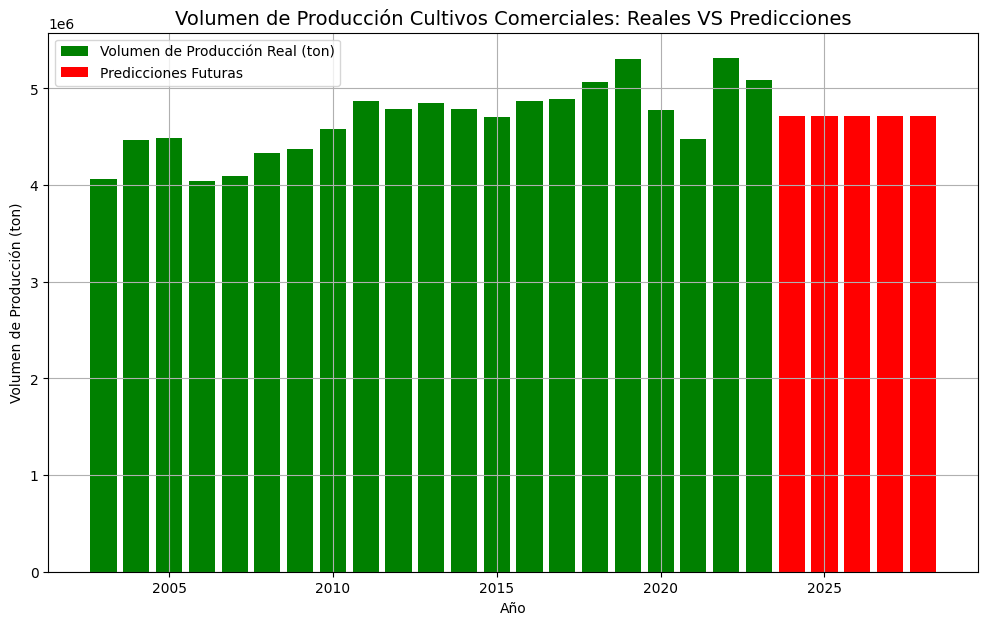

In [84]:
# Graficar volumen de producción

#Datos futuros (años y predicciones)
años_futuros_lista = años_futuros.flatten().tolist()
produccion_predicciones_futuras = predicciones_futuras.tolist()

plt.figure(figsize=(12, 7))
# Gráfica de barras para los datos históricos
plt.bar(df_pred_comer['Año'], df_pred_comer['Volumenproduccion'], label='Volumen de Producción Real (ton)', color='green')

# Gráfica de barras para las predicciones futuras
plt.bar(años_futuros_lista, produccion_predicciones_futuras, label='Predicciones Futuras', color='red')

plt.title('Volumen de Producción Cultivos Comerciales: Reales VS Predicciones', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Volumen de Producción (ton)')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
cultivos_sa = ['MaÃ\xadz grano', 'Frijol', 'Tomate rojo (jitomate)', 'Papa', 'Trigo grano','Soya', 'Garbanzo grano']
df_sa = df[df['Nomcultivo'].isin(cultivos_sa)]


In [86]:
df_saT = df_sa.groupby('Año').agg({
    'Volumenproduccion': 'sum',
    'Valorproduccion': 'sum', 
}).reset_index()

In [87]:
df_pred_sa = pd.merge(df_saT, dfPP, on=['Año'], how='left')
df_pred_sa = pd.merge(df_pred_sa, dfPT, on=['Año'], how='left')


In [88]:
#Predicciones para los proximos 5 años para el volumen de producciòn

X = df_pred_sa[['Año', 'Valorproduccion','Prom_anual','PromTemp_anual']]
y = df_pred_sa['Volumenproduccion']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creando y entrenando el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

años_futuros = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
X_futuro = pd.DataFrame({'Año': años_futuros.flatten(),
                         'Valorproduccion':np.mean(X_train['Valorproduccion']),
                          'Prom_anual': np.mean(X_train['Prom_anual']),
                          'PromTemp_anual': np.mean(X_train['PromTemp_anual'])})

#Escalar los datos de predicciòn futura
X_futuro_scaled = scaler.transform(X_futuro)

predicciones_futuras = model.predict(X_futuro_scaled)

#Mostrar las predicciones
for Año, pred in zip(años_futuros.flatten(), predicciones_futuras):
    print(f'Predicciòn para el año {Año}: {pred:.2f} toneladas')

#Evaluacion del modelo en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

#Calcular las mètricas de error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse: .2f}')



Predicciòn para el año 2024: 1212365.60 toneladas
Predicciòn para el año 2025: 1180905.67 toneladas
Predicciòn para el año 2026: 1149445.75 toneladas
Predicciòn para el año 2027: 1117985.82 toneladas
Predicciòn para el año 2028: 1086525.89 toneladas
MAE: 209759.88
RMSE:  327062.86


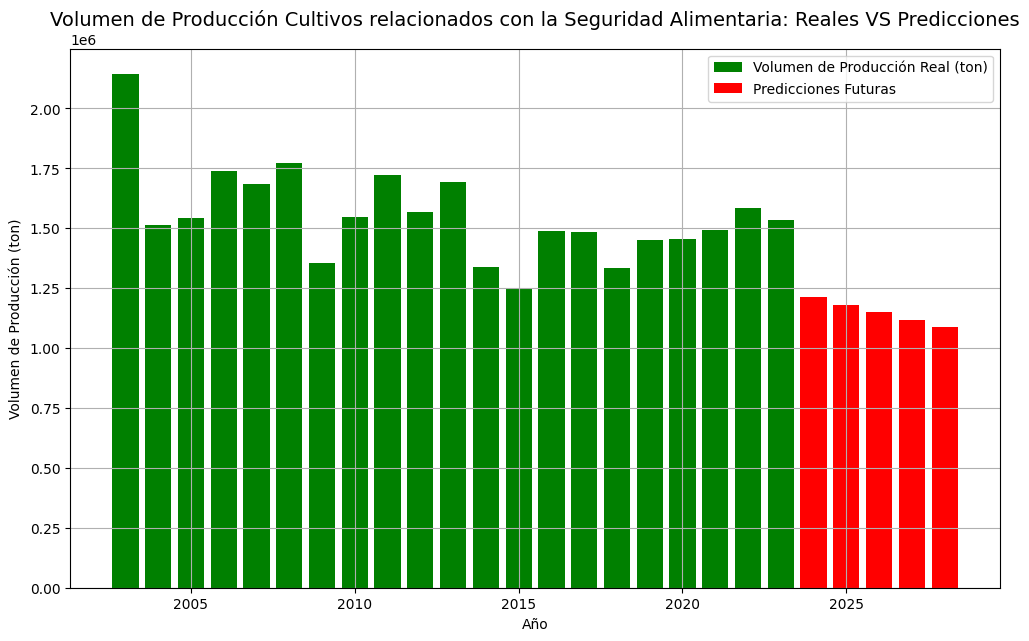

In [89]:
# Graficar volumen de producción

#Datos futuros (años y predicciones)
años_futuros_lista = años_futuros.flatten().tolist()
produccion_predicciones_futuras = predicciones_futuras.tolist()

plt.figure(figsize=(12, 7))
# Gráfica de barras para los datos históricos
plt.bar(df_pred_sa['Año'], df_pred_sa['Volumenproduccion'], label='Volumen de Producción Real (ton)', color='green')

# Gráfica de barras para las predicciones futuras
plt.bar(años_futuros_lista, produccion_predicciones_futuras, label='Predicciones Futuras', color='red')

plt.title('Volumen de Producción Cultivos relacionados con la Seguridad Alimentaria: Reales VS Predicciones', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Volumen de Producción (ton)')
plt.legend()
plt.grid(True)
plt.show()

Predicciòn para el año 2024: 6316511.33 toneladas
Predicciòn para el año 2025: 6298472.66 toneladas
Predicciòn para el año 2026: 6280433.99 toneladas
Predicciòn para el año 2027: 6262395.33 toneladas
Predicciòn para el año 2028: 6244356.66 toneladas

Predicciòn para el año 2024: 4713296.48 toneladas
Predicciòn para el año 2025: 4714229.71 toneladas
Predicciòn para el año 2026: 4715162.93 toneladas
Predicciòn para el año 2027: 4716096.16 toneladas
Predicciòn para el año 2028: 4717029.39 toneladas

Predicciòn para el año 2024: 1212365.60 toneladas
Predicciòn para el año 2025: 1180905.67 toneladas
Predicciòn para el año 2026: 1149445.75 toneladas
Predicciòn para el año 2027: 1117985.82 toneladas
Predicciòn para el año 2028: 1086525.89 toneladas

In [90]:
df_pred = df_pred.drop(columns=['Valorproduccion','Prom_anual','PromTemp_anual'])
df_pred_comer = df_pred_comer.drop(columns=['Valorproduccion','Prom_anual','PromTemp_anual'])
df_pred_sa = df_pred_sa.drop(columns=['Valorproduccion','Prom_anual','PromTemp_anual'])

In [91]:
# Nuevas filas como lista de diccionarios
add_pred_tot = [{'Año': 2024, 'Volumenproduccion': 6316511.33}, {'Año': 2025, 'Volumenproduccion': 6298472.66},
                {'Año': 2026, 'Volumenproduccion': 6280433.99},{'Año': 2027, 'Volumenproduccion': 6262395.33},{'Año': 2028, 'Volumenproduccion': 6244356.66}]
df_pred_tot = pd.DataFrame(add_pred_tot)

# Agregar las nuevas filas usando concat
df_pred_tot_final = pd.concat([df_pred, df_pred_tot ], axis=0).reset_index(drop=True)

# Convertir el DataFrame a un archivo CSV
df_pred_tot_final.to_csv('total.csv', index=False)


In [94]:
# Nuevas filas como lista de diccionarios
add_pred_comer = [{'Año': 2024, 'Volumenproduccion': 4713296.48}, {'Año': 2025, 'Volumenproduccion': 4714229.71},
                {'Año': 2026, 'Volumenproduccion': 4715162.93},{'Año': 2027, 'Volumenproduccion': 4716096.16},{'Año': 2028, 'Volumenproduccion': 4717029.39}]
df_pred_comer_tot = pd.DataFrame(add_pred_comer)

# Agregar las nuevas filas usando concat
df_pred_comer_final = pd.concat([df_pred_comer, df_pred_comer_tot ], axis=0).reset_index(drop=True)

# Convertir el DataFrame a un archivo CSV
df_pred_comer_final.to_csv('comercial.csv', index=False)


In [95]:
# Nuevas filas como lista de diccionarios
add_pred_sa = [{'Año': 2024, 'Volumenproduccion': 1212365.60}, {'Año': 2025, 'Volumenproduccion': 1180905.67},
                {'Año': 2026, 'Volumenproduccion': 1149445.75},{'Año': 2027, 'Volumenproduccion': 1117985.82},{'Año': 2028, 'Volumenproduccion': 1086525.89}]
df_pred_sa_tot = pd.DataFrame(add_pred_sa)

# Agregar las nuevas filas usando concat
df_pred_sa_final = pd.concat([df_pred_sa, df_pred_sa_tot ], axis=0).reset_index(drop=True)

# Convertir el DataFrame a un archivo CSV
df_pred_sa_final.to_csv('seg_alimentaria.csv', index=False)
